# QSB-1 Data Analysis Project: Instructions

### Marking Scheme

**Tasks 1, 2 and 3** ask you to write functions to perform specified tasks. Please complete the functions in the markdown cells provided, removing the `# YOUR CODE HERE` and `raise NotImplementedError()` text from the cell and replacing with your own code. These functions will be automatically marked by a computer, which will test whether your functions perform the required operations and award marks where those tests pass. You will receive partial marks if your code runs but fails to perform some of the requirements, but you will not receive any marks if you code produces an error or fails to return any valid values. It is critical that your functions are named as specified in the questions and that they return the values requested, without any additional output.

Please see **this video** for a full description of how to use the autograder cells to test your functions.

**Tasks 4 to 9** are manually marked, according to the marks shown beside each question. In this section, you will be scored on correct coding, appropriate choice of tables or graphs and in presenting them in accordance with good principles for the display of data (such as using appropriate axis labels and titles).

### Plagiarism and collusion

This data analysis project forms a part of your course assessment and **must be your own work**. You are encouraged to use the self study notebooks, workshop notebooks, internet search and online Python documentation, and to use or adapt code examples from each of those sources.  However you must not help or receive help from anyone, and must not use code written by other students.

You must use Python comments (#) to give the source of any code you have taken or adapted from other sources unless it is from the course notebooks and workshop material.

All work will be checked for evidence of plagiarism and collusion - please familiarise yourself with the information on plagiarism in the course handbook.

### Deadline and submission information

This workbook will be automatically submitted at 2pm on Monday 7th December, which is the deadline for this assignment. You do not need to do anything to submit other than ensure your notebook is saved (Click File>Save to the upper left hand side of this page).


# Analysing SARS-Cov-2 sequence data: searching for Doug, Nick and Alvin 

Since viral genomes mutate over time, molecular epidemiologists are able to track the spread of viral variants by sequencing the viral genomes as cases arise. In this study, we will analyse 67,243 sequences from the SARS-CoV-2 genomes sequenced by [COVID-19 Genomics UK (COG-UK)](https://www.cogconsortium.uk) to detect mutations. We will concentrate our search on the Spike protein, the surface glycoprotein that studs the virus surface and is responsible for cell entry by binding to angiotensin-converting enzyme 2 (ACE2) on the host cell. 

In this project you will study three amino acid mutations in the Spike protein that have been identified in public SARS-CoV-2 sequence databases. 
<div style="text-align: center">
<img src="spike_tr.png" width="90%" align="middle" />
</div>

## Who are Doug, Nick and Alvin?

 Two viral phylogenomics researchers working in Professor Andrew Rambaut's group at the University of Edinburgh, Aine O'Toole and Verity Hill, named the D614G mutant Doug, with wild-type viral strains lacking the mutation (D614) called Dougless. As more mutations were discovered, Nick (N439K) / Nickless and Alvin (A222V) followed, continuing this nerdy but hilarious unofficial naming convention.
 
<div style="text-align: center">
 <img src="cartoon.png" width="50%" align="middle"/>
</div>


# Part 1

Sequences in the [COVID-19 Genomics UK (COG-UK)](https://www.cogconsortium.uk) database can be freely downloaded but must be processed to extract the Spike protein sequences and to filter out any sequences that contain poor sequence quality that might affect the analysis. Here, you will write functions that could be used to perform parts of the extraction and validation of the DNA sequences.

You may be wondering why we're talking about analysing DNA sequences when the SARS-CoV2 virus, as a member of the Coronaviridae, has a positive-stranded RNA genome. This is because the genomes are published as DNA sequences since the RNA sequence is converted to DNA during a process of PCR amplification prior to genome sequencing, therefore they use Thymidine (T) rather then Uracil (U). 

## Task 1: Processing DNA sequences

One of the tasks that bioinformaticians need to do is to detect protein-coding genes by looking for start and stop codons in the sequenced viral genomes. Write a Python function named `'start_present'` in the following code cell that takes a single DNA sequence (string) as an argument and returns the Boolean value `True` if the sequence **starts with** 'ATG' and `False` if it does not. **(2 marks)**


In [1]:
def start_present(dna_seq):
    ### BEGIN SOLUTION
    '''Returns True if dna_seq startwith ATG, else returns False'''
    if dna_seq.startswith('ATG'):
        return True
    else:
        return False
    ### END SOLUTION

## Task 2: Filtering valid DNA sequences


DNA sequences in public databases may be incomplete or may contain regions of unknown sequence, where the letter 'N' or 'n' is used to indicate that the sequence is ambiguous for that nucleotide position. For example, the DNA sequence 'GGTCACN' contains an ambiguous nucleotide at the last position. 

We may also be interested in filtering out sequences that are too long or short from our analyses: for example, the SARS-CoV-2 Spike Protein sequence data that are provided later in this project were filtered by removing any sequences that were not 3822 nucleotides in length, to remove sequences that may be truncated or erroneous.

Write a Python function named `'filter_seq'` in the following code cell that takes a **list of DNA sequences** as an argument and returns a **list** containing only those sequences that pass the following two criteria:

1. The sequence contains only the nucleotide letters A, C, G or T, or their lowercase equivalents, and no ambiguous nucleotides (N or n). **(3 marks)**
2. The sequence must be exactly 72 nucleotides long. **(2 marks)**

In addition: 
* Your function must accept DNA sequences in the argument to be in lowercase, UPPERCASE or a mixture of both. All sequences that meet the criteria must be returned in UPPERCASE. **(2 marks)**
* Your function must have a valid function docstring (any text is acceptable). **(1 mark)**

You will gain partial credit if your function runs but implements only some of the above criteria.

In [2]:
def filter_seq(dna_seqs):
    ### BEGIN SOLUTION
    ''' Input: list of DNA sequences (strings)
        Output: list of DNA sequences that pass filter
    '''
    output =[]
    for seq in dna_seqs:
        seq_upper=seq.upper()
        if len(seq_upper)==72 and not 'N' in seq_upper:
            output.append(seq_upper)
    return output
    ### END SOLUTION

## Task 3: Calling protein sequence variants

We are interested in studying amino acid mutations in our SARS-Cov-2 Spike protein sequences, therefore we need a way to detect which amino acid is at a particular position in the protein. For example, if we're looking for the 'Doug' mutation, we would want to look at position 614 in the protein to determine whether it is an aspartate (D) or glycine (G) amino acid residue. Since we're starting with a DNA sequence, we'll need to first translate our DNA to protein, then look up the amino acid at the specified position.

Write a Python function named `'call_variant'` in the following code cell that takes two arguments. The first argument is a single DNA sequence which you can assume is in UPPERCASE and contains only the letters A, C, G or T.

Within your function you should translate the DNA sequence into an amino acid sequence.

The second argument of the function `'call_variant'` is a position in the amino acid sequence. Your function should return the amino acid letter at this position in the amino acid sequence you have constructed. For example, if your translated DNA sequence is 'VRPL' and the required position is 2, then your function should return amino acid letter 'R'. (Remember that the second position in a string is at index 1.) **(5 marks)**

If the position passed to the function is zero or is beyond the end of the amino acid sequence your function should **return** the string 'Error'. *Please ensure that your function returns and does not print this string.* **(5 marks)**



In [3]:
def call_variant(dna_seq, position):
    ### BEGIN SOLUTION
    table = { 
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
    } 
    protein="" 
    if len(dna_seq)%3 == 0: 
        for i in range(0, len(dna_seq), 3): 
            codon = dna_seq[i:i + 3] 
            protein+= table[codon] 
    if 0 < position <= len(protein):
        return protein[position-1]
    else: 
        return 'Error'
    ### END SOLUTION

# Part 2: Exploring SARS-CoV-2 Spike Protein Sequences

For the second part of this analysis, in early November more than 100,000 sequences were downloaded from the COG-UK database and filtered using functions similar to those you have implemented above to extract full length Spike nucleotide sequence without ambiguous nucleotide calls, and to extract the amino acid calls at positions 222, 439 and 614.

You have been given a CSV file called [spike_proteins.csv](spike_proteins.csv) of this processed SARS-CoV-2 Spike protein sequence data. The code below will load this CSV file as a Pandas dataframe. It also sets the 'month_name' column as an ordered categorical variable so that plots and tables are ordered chronologically (something we have not covered in the course).

**Run the following code cell to read in the SARS-CoV-2 protein sequence dataset.**


In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype

# Read in SARS-CoV-2 Spike Protein Sequences into a pandas dataframe
spike_df = pd.read_csv('spike_proteins.csv')

# Set the type of the variable month_name as categorical ordinal so that plots and tables are ordered chronologically
cat_type = CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
spike_df['month_name'] = spike_df['month_name'].astype(cat_type)

# Output the first 10 rows
print(spike_df.head(10))

# Output the number of rows and columns
spike_df.shape

             sequence_name  country sample_date  epi_week position_614  \
0  England/PHEC-10E9A/2020  England  2020-01-29         5            D   
1  England/PHEC-10EC7/2020  England  2020-02-08         6            D   
2  England/PHEC-10EB8/2020  England  2020-02-08         6            D   
3  England/PHEC-10F1F/2020  England  2020-02-09         7            D   
4  England/PHEC-1AFD9/2020  England  2020-02-09         7            D   
5  England/PHEC-1AFE8/2020  England  2020-02-13         7            D   
6  England/PHEC-1B002/2020  England  2020-02-14         7            D   
7  England/PHEC-1B06C/2020  England  2020-02-16         8            D   
8  England/PHEC-20FFE/2020  England  2020-02-16         8            G   
9  England/PHEC-1B04E/2020  England  2020-02-16         8            D   

  position_439 position_222  S_mutations month_name  month  
0            N            A            0    January      1  
1            N            A            0   February      2  
2 

(67243, 10)

Each row represents one viral isolate from the COG_UK sequence database. The dataframe has the following variables (column headers):

* **sequence_name**: Unique identifier for the viral isolate sequencing record
* **country**: UK Country of Origin of the sample
* **sample_date**: Date of sample collection in the format YYYY-MM-DD
* **epi_week**:  Epidemiological week: the number of weeks since the start of the year
* **position_614**: Amino acid letter at position 614
* **position_439**: Amino acid letter at position 439
* **position_222**: Amino acid letter at position 222
* **S_mutations**: The total number of amino acid changes (also known as synonymous mutations) compared to the sequence of the first ever sequenced genome, [Wuhan-Hu-1] (https://www.ncbi.nlm.nih.gov/nuccore/1798174254)
* **month_name**: The name of the month in which the sample was taken
* **month**: Numeric coded month of sample collection (1=January, 2=February, etc)

## Task 4

What are the **types** of each of the variables in this dataset? Put your answers in the following markdown cell. **(Formative question: 0 marks)**

### Write your answer to Task 4 in this cell

* sequence_name:
* country:
* sample_date:
* epi_week:
* position_614:
* position_439:
* position_222:
* S_mutations:
* month_name:
* month:

### Task 4 answers (0 marks)
=== BEGIN MARK SCHEME ===
variable | type
:---|:---
sequence_name | categorical nominal
country | categorical nominal
sample_date | categorical ordinal
epi_week | categorical ordinal or numerical discrete
position_614 | categorical nominal
position_439 | categorical nominal
position_222 | categorical nominal
S_mutations | numerical discrete
month_name | categorical ordinal
month | categorical ordinal or numerical discrete
=== END MARK SCHEME ===

## Task 5

Using the code cell below, plot an appropriate graph to show the number of sequences collected in each calendar month. **(5 marks)**


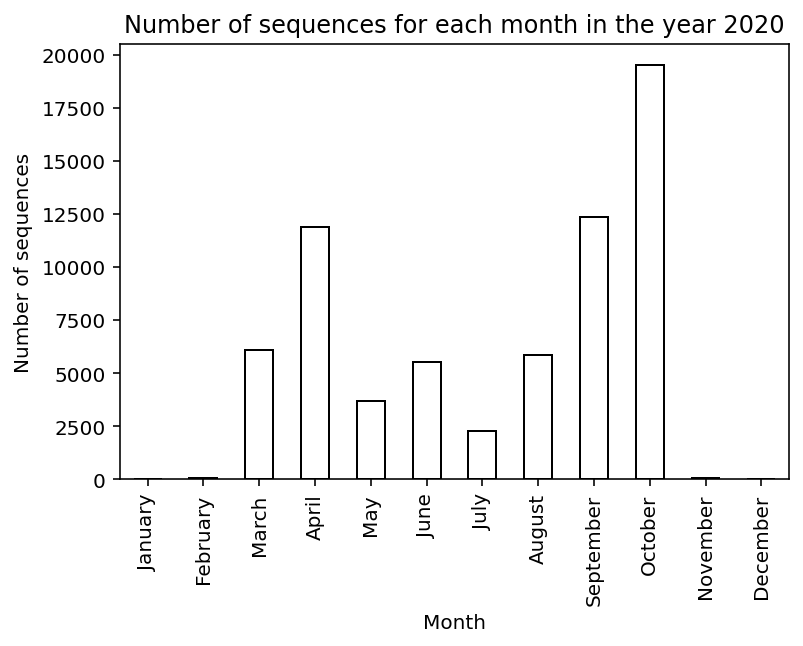

In [2]:
### BEGIN SOLUTION
%matplotlib inline
import matplotlib.pyplot as plt

# Create a frequency table of sequence counts each month.
freq_table = spike_df['month_name'].value_counts(sort=False)

# Create a bar plot of the frequency table.

freq_table.plot.bar(facecolor='w', edgecolor='k');
plt.xlabel('Month');
plt.ylabel('Number of sequences');
plt.title('Number of sequences for each month in the year 2020');
### END SOLUTION

## Task 6

Using the code cell below, create and print three frequency tables of the amino acid letters in each of the positions 222, 439 and 614. **(3 marks)**

In [6]:
### BEGIN SOLUTION
alvin  = spike_df['position_222'].value_counts()
print(alvin)
nick  = spike_df['position_439'].value_counts()
print(nick)
doug  = spike_df['position_614'].value_counts()
print(doug)
### END SOLUTION

A    48068
V    19171
S        2
P        1
F        1
Name: position_222, dtype: int64
N    66812
K      431
Name: position_439, dtype: int64
G    62980
D     4258
N        5
Name: position_614, dtype: int64


## Task 7

Is there an association between amino acid letter in position 614 and calendar month? 

In the code cell below, create an appropriate table to show the frequency of the amino acid letters at position 614 in each calendar month. **(5 marks)**

In [7]:
### BEGIN SOLUTION
#Cross tab of frequency of D614G
table = pd.crosstab(spike_df['month_name'], spike_df['position_614'])
table
### END SOLUTION

position_614,D,G,N
month_name,,,
January,1,0,0
February,35,23,0
March,2374,3694,1
April,1623,10245,4
May,139,3540,0
June,64,5479,0
July,7,2247,0
August,9,5834,0
September,3,12346,0


## Task 8

In the code cell below, create an appropriate graph of the **relative frequency** of amino acid letters in each month. **(5 marks)**

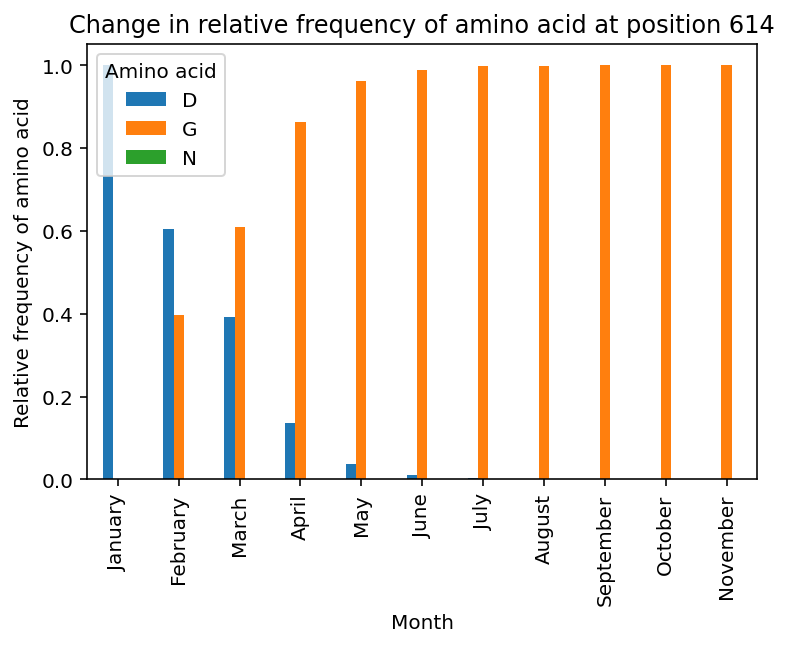

In [8]:
### BEGIN SOLUTION
#Cross tab of frequency of D614G
table = pd.crosstab(spike_df['month_name'], spike_df['position_614'], normalize='index')
table.plot.bar()
plt.xlabel('Month')
plt.ylabel('Relative frequency of amino acid')
plt.title('Change in relative frequency of amino acid at position 614')
plt.legend(title='Amino acid');
### END SOLUTION

## Task 9

Based on the above table and graph, do you think that glycine (G) has replaced aspartate (D) at position 614 in the UK population? Write your answer in the following markdown cell. **(1 mark)**

### Write your answer to Task 9 in this cell
=== BEGIN MARK SCHEME ===

Glycine had replaced aspartate at position 614 in the UK population by the summer.

=== END MARK SCHEME ===

# Autograder Test Cells

You can use the autograder tests below to test that your functions are working correctly. If your function is correct, running the cell will print a message stating that the test has passed. If there is an error in your function, the code cell will produce an Assertion Error. You may also add additional code cells in this notebook to help you to debug your code, but please remove these prior to the project submission date.

Please note that you must run the cell containing your functions before running these cells. If you have made changes to a function, you must re-run that cell before running a test again to get an accurate result. 

### Task 1 Autograder

In [9]:
# Check that the function start_present() returns the correct output for several different inputs.
# This cell will run without error if start_present() works as specified.
from nose.tools import assert_equal
assert_equal(start_present('ATGGTAGCAGGCTATTAA'), True)
assert_equal(start_present('TGTAGGCATTAAATGTATGA'), False)
assert_equal(start_present('GGCTGTAGGCATGTATGA'), False) #internal ATG - should not be detected
assert_equal(start_present('ATGTGTAGGCATTAGATGTATG'), True) #mutliplt ATG codons (including at start)
### END HIDDEN TESTS
print('Test passed: function start_present() is working correctly.')

Test passed: function start_present() is working correctly.


### Task 2 Autograders

This task has four requirements for which marks are assigned, therefore there are four autograders that must all pass for full marks.

In [10]:
# Check that filter_seq() excludes sequences containing ambiguous (N) nucleotides.
# This cell will execute without error if filter_seq() is correctly excluding sequences containing N nucleotides.

from nose.tools import assert_equal
test_seqs_N=['CCGATTAGGACCATCTAATGCACTTGTTACAAGACTTCTTTTAAATACTTTCTTCCTGCCCAGTAGCGGATG', 'ATAATGGTTGTTGCCAGCCGGTGTGGAAGGTAACAGCACCGGTGCGAGCCTAATGTGCCGTCTCCACCAACA', 'TAGTATACGTCTAGGCGTCACCCGCCATCTCTGTGCAGGTGGGCCGACGAGACATTGTCCCTGATTTCTCCA', 'TGCACTACCGTCANNTACGCTAGTATGCGTTCTTCCTTCCAGAGGTATGTGGCTGCGTGGTCAAAAGTGCGG', 'CATTCGTATTTGCTCCTCGTGTTTACTCTCACAAACTTGACCTGGAGNANAAGGAGATGCTTCTTGTGGAAC']
correct_seqs=['CCGATTAGGACCATCTAATGCACTTGTTACAAGACTTCTTTTAAATACTTTCTTCCTGCCCAGTAGCGGATG', 'ATAATGGTTGTTGCCAGCCGGTGTGGAAGGTAACAGCACCGGTGCGAGCCTAATGTGCCGTCTCCACCAACA', 'TAGTATACGTCTAGGCGTCACCCGCCATCTCTGTGCAGGTGGGCCGACGAGACATTGTCCCTGATTTCTCCA']

assert_equal(filter_seq(test_seqs_N), correct_seqs)
print('Test 1 of 4 passed: filter_seq excluded sequences with N nucleotides.')

Test 1 of 4 passed: filter_seq excluded sequences with N nucleotides.


In [11]:
# Check that filter_seq() removes sequences that are not 72 nucleotides long.
# This cell will execute without error if filter_seq() excludes sequences that are not exactly 72 nucleotides in length.

from nose.tools import assert_equal
test_seqs_length=['CCGATTAGGACCATCTAATGCACTTGTTACAAGACTTCTTTTAAATACTTTCTTCCTGCCCAGTAGCGGATG', 'ATAATGGTTGTTGCCAGCCGGTGTGGAAGGTAACAGCACCGGTGCGAGCCTAATGTGCCGTCTCCACCAACA', 'TAGTATACGTCTAGGCGTCACCCGCCATCTCTGTGCAGGTGGGCCGACGAGACATTGTCCCTGATTTCTCCA', 'CTACTAATAGCACACACGGGGCAATACCAGCACAAGCTAGTCTCGCGGGAACGCTCGTCAGCATACGAAAGAGC', 'CTTGGGTGTTT']
correct_seqs=['CCGATTAGGACCATCTAATGCACTTGTTACAAGACTTCTTTTAAATACTTTCTTCCTGCCCAGTAGCGGATG', 'ATAATGGTTGTTGCCAGCCGGTGTGGAAGGTAACAGCACCGGTGCGAGCCTAATGTGCCGTCTCCACCAACA', 'TAGTATACGTCTAGGCGTCACCCGCCATCTCTGTGCAGGTGGGCCGACGAGACATTGTCCCTGATTTCTCCA']
assert_equal(filter_seq(test_seqs_length), correct_seqs)
print('Test 2 of 4 passed: filter_seq excluded sequences not of 72 nucleotides in length')

Test 2 of 4 passed: filter_seq excluded sequences not of 72 nucleotides in length


In [12]:
# Check that filter_seq() converts all sequences to UPPERCASE
# This cell will execute without error filter_seq() converts all returned sequences to uppercase
from nose.tools import assert_equal
test_seqs_case=['CCGATTAGGACCATCTAATGCACTTGTTACAAGACTTCTTTTAAATACTTTCTTCCTGCCCAGTAGCGGATG', 'ataatggttgttgccagccggtgtggaaggtaacagcaccggtgcgagcctaatgtgccgtctccaccaaca', 'tagtatacgtctAGGCGTCACCCGCCATCTCTGTGCAGGTGGGCCGACGAGAcatTGTCCCTGATTTCTccT']
correct_seqs=['CCGATTAGGACCATCTAATGCACTTGTTACAAGACTTCTTTTAAATACTTTCTTCCTGCCCAGTAGCGGATG', 'ATAATGGTTGTTGCCAGCCGGTGTGGAAGGTAACAGCACCGGTGCGAGCCTAATGTGCCGTCTCCACCAACA', 'TAGTATACGTCTAGGCGTCACCCGCCATCTCTGTGCAGGTGGGCCGACGAGACATTGTCCCTGATTTCTCCT']
assert_equal(filter_seq(test_seqs_case), correct_seqs)
print('Test 3 of 4 passed: filter_seq accepted UPPERCASE and lowercase input and output in UPPERCASE')

Test 3 of 4 passed: filter_seq accepted UPPERCASE and lowercase input and output in UPPERCASE


In [13]:
# Check for a docstring in filter_seq()
# This cell will execute without error filter_seq() has a docstring
from nose.tools import assert_equal, assert_true
assert_true(filter_seq.__doc__ is not None)
print('Test 4 of 4 passed: filter_seq has a docstring')

Test 4 of 4 passed: filter_seq has a docstring


### Task 3 Autograders

This task has two components for which marks are assigned, therefore there are two autograders that must both pass for full marks. 


In [14]:
# Check that call_variant() returns the correct output for several different inputs.
from nose.tools import assert_equal
assert_equal(call_variant('ATGCGACATTGGGATCTGTCTGTTGTCATTCGCGGAAAACATCCGTTCACGAGGCGGACACTGATTGACACGGTTTAA', 6 ), 'L')
assert_equal(call_variant('ATGTTGCAAAGGTTAGGGAATAGGTTATAA', 4), 'R')
print('Test 1 of 2 passed: call_variant() produced correct output for sequences within range')

Test 1 of 2 passed: call_variant() produced correct output for sequences within range


In [15]:
# Check that call_variant() returns 'Error' if the position searched is outwith the translated protein sequence.
from nose.tools import assert_equal
assert_equal(call_variant('ATGCGACATTGGGATCTGTCTGTTGTCATTCGCGGAAAACATCCGTTCACGAGGCGGACACTGATTGACACGGTTTAA', 62 ), 'Error')
assert_equal(call_variant('ATGTTGCAAAGGTTAGGGAATAGGTTATAA', 41), 'Error')
assert_equal(call_variant('ATGTTGCAAAGGGTAACGGAGTTAGGGAATAGGTTATAA', 0), 'Error')
print('Test 2 of 2 passed: call_variant() returned "Error" when position was either 0 or beyond the end of the protein sequence string.')

Test 2 of 2 passed: call_variant() returned "Error" when position was either 0 or beyond the end of the protein sequence string.
